# Convolutional Neural Network (CNN) Example using TensorFlow Strategy

Version 007.a

Read a Keras.flow_from_directory() compliant set of images to create a CNN maximizing CPU/GPU potential using Tensorflow.strategy().

References:
+ https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-satellite-photos-of-the-amazon-rainforest/


In [53]:
# Python 3.7.3
############################################
# INCLUDES
############################################

# !!! Always use the same initilization to randomness for purposes of evaluating training quality.
# !!! If you allow for a completely random value every-time you will get different results.
# !!! The nature of a neural layer is stochastic assignment of weights to each layer
# seed the pseudorandom number generator
SEED_INIT = 7
from random import seed
seed(SEED_INIT)

from random import random
from random import randint

#libraries specific to this example
import tensorflow as tf
tf.random.set_seed(SEED_INIT)

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model

from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

#existing trained model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16

# hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import backend
from tensorflow.keras.backend import clear_session

from tensorflow.keras.optimizers import SGD

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

#Data Science Libraries
import numpy as np
from numpy import zeros
from numpy import asarray
from numpy import save
from numpy import savez_compressed
import pandas as pd
from pandas import read_csv
import scipy as sp
import scipy.ndimage

#used for "by-hand" processing of incoming data and grid search of hyper-parameters
#note that GridSearchCV DOES NOT support GPU's.  If you try you will get spurious error messages.
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score


#read and show images, plotting libraries
from matplotlib import pyplot
from matplotlib.image import imread
import matplotlib as mpl
import matplotlib.pyplot as plt
#import the PIL (Python Image Library)
import PIL
from PIL import Image

from array import *

# seed the pseudorandom number generator
from random import seed
from random import random
from random import randint

#a set of libraries that perhaps should always be in Python source
import os 
from os import listdir

import datetime
import sys
import gc
import getopt
import inspect
import math
import warnings
import types

#a darn useful library for creating paths and one I recommend you load to your environment
from pathlib import Path

# can type in the python console `help(name of function)` to get the documentation
from pydoc import help         

#Import a custom library, in this case a fairly useful logging framework
debug_lib_location = Path("./")
sys.path.append(str(debug_lib_location))
import debug

warnings.filterwarnings('ignore')               # don't print out warnings


root_location="/projects/intro/";

In [54]:
#Turn on Eager Execution
#tf.enable_eager_execution()

In [55]:
############################################
#JUPYTER NOTEBOOK OUTPUT CONTROL / FORMATTING
############################################
#set floating point to 4 places to things don't run loose
pd.options.display.float_format = '{:,.4f}'.format
np.set_printoptions(precision=4)

# Variable declaration

In [56]:
############################################
# GLOBAL VARIABLES
############################################
DEBUG = 1                            #General ledger output so you know what's happening.
DEBUG_DATA = 1                       #Extremely verbose output, change to zero (0) to supress the volume of output.

# CODE CONSTRAINTS
VERSION_NAME    = "MLCNNSTRAT"
VERSION_ACRONYM = "ML-CNN-Strategy"
VERSION_MAJOR   = 0
VERSION_MINOR   = 0
VERSION_RELEASE = "7a"
VERSION_TITLE   = VERSION_NAME + " (" + VERSION_ACRONYM + ") " + str(VERSION_MAJOR) + "." + str(VERSION_MINOR) + "." + str(VERSION_RELEASE) + " generated SEED."

ENCODING  ="utf-8"
############################################
# GLOBAL CONSTANTS
############################################
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

############################################
# APPLICATION VARIABLES
############################################
root_folder = os.getcwd() + os.sep + '..' + os.sep + 'INTRO_DATA'+ os.sep + 'CNN_Beta_002_15KClub'
                                     #actual datafiles are up and over, trying to get relative and abstract os at the same time
    
    
label_names=["appinhousePlankton", "chaetoPlankton", "cleanhousePlankton", "diatomPlankton", "hydromedusaePlankton", "snowPlankton"]
                                    #domain of plankton labels used in training, directory names under train/test have to correlate to this.
datasets=[  "test", "train"]
imgs_to_show=9

ENCODING  ="utf-8"

SEED_INIT = 7
IMG_SIZE=224
IMG_DIMS=3
IMG_HEIGHT_SHIFT_RNG=0.1
IMG_WIDTH_SHIFT_RNG=0.1
IMG_ROTATION_RNG=90
IMG_BATCH_SIZE=64          #reducing batch size can improve low memory issues but increases time.
IMG_BATCH_SIZE=16
#CLASS_MODE='binary'
CLASS_MODE='categorical'  #processing multiple layers
OUTPUT_LAYERS=6

############################################
# GLOBAL CONFIGURATION
############################################
os.environ['PYTHONIOENCODING']=ENCODING

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

## General Function Declaration

In [57]:
############################################
# WARNING / ERROR Management
############################################
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()


############################################
# FUNCTIONS
############################################

def prototype(incMonth):

    debug.msg_info("Entering {}.{}".format(__name__, inspect.stack()[0][3]))
    debug.msg_info("The month you passed in was " + str(incMonth))
    debug.msg_info("Exiting {}.{}".format(__name__, inspect.stack()[0][3]))
    return 1

def lib_diagnostics():
    debug.msg_debug("System version    #:{:>12}".format(sys.version))
    netcdf4_version_info = nc.getlibversion().split(" ")
    debug.msg_debug("netCDF4 version   #:{:>12}".format(netcdf4_version_info[0]))
    debug.msg_debug("Matplotlib version#:{:>12}".format(matplt.__version__))
    debug.msg_debug("Numpy version     #:{:>12}".format(np.__version__))
    debug.msg_debug("Pandas version    #:{:>12}".format(pd.__version__))
    debug.msg_debug("SciPy version     #:{:>12}".format(sp.__version__))

    return


def get_full_version():

    resultant = str(VERSION_NAME) + "  v" + str(VERSION_MAJOR) + "." + str(VERSION_MINOR) + "." + str(VERSION_RELEASE)
    return resultant

def get_version():

    resultant = str(VERSION_MAJOR) + "." + str(VERSION_MINOR) + "." + str(VERSION_RELEASE)
    return resultant

def printversion():

    print(get_full_version())

def printusage():

    print("")
    printversion()
    print("  -v, --version    prints the version of this software package.")
    print("")
    print("  * - indicates required argument.")

######################################################################
#Support routines to see columns in DataFrames
######################################################################
def show_columns_plain(inc_ary):
    new_ary = []
    for col in inc_ary:
        new_ary.append(np.char.lower(col))
    new_ary.sort
    myOutputString = " "
    for col in new_ary:
        myOutputString = myOutputString + " " + str(col)
    return myOutputString

def show_columns_true(inc_ary):
    new_ary = []
    for col in inc_ary:
        new_ary.append(col)
    new_ary.sort
    myOutputString = " "
    for col in new_ary:
        myOutputString = myOutputString + " " + str(col)
    return myOutputString

######################################################################
#Input Validation
######################################################################
# valid string:
#  We don't want the following:
#   - at the start of the file name (might be construed as a switch)
#  $, &, |, ;, <, >, `, !, *, ", \ (to start with)
###
def validstring(testsubject):

    if testsubject[0] == "-":
        return 0
    elif "$" in testsubject or "&" in testsubject or "|" in testsubject:
        return 0
    elif ";" in testsubject or "`" in testsubject or "!" in testsubject:
        return 0
    elif "*" in testsubject or '"' in testsubject or "\\" in testsubject:
        return 0
    else:
        return 1
        

In [58]:
# %load ./libs.py
#Title:     Displays the libraries in current use.
#Objective: Invocation is intended as function calls within another program.
#Assumptions:
#           1. Should be stored in standardized location such as:
#                      /p/home/{user_name}/usr/PYTHONLIB
#           2. Developer loads the module (Jupyter Lab).
#Pre-Requisites:
#           1. Python v3.*
#           2. Jupyter Lab / Notebook (%load libs.py)
#Usage:
#       %load libs.py
#       find_loaded_modules().HTML
#
#Version History:
# ------------------------------------------------------------------------
# Version   Date       Modification                              Author
# ------------------------------------------------------------------------
# 1.0       2020/04/29 Inception                                 Radiance
# ------------------------------------------------------------------------
# ------------------------------------------------------------------------


#######################################################################
#LIBRARIES
#######################################################################
import os
import types

def module_version(mod):
    '''Return version string for module *mod*, or nothing if
    it doesn't have a "version" or "__version__" attribute.'''
    version = []
    if hasattr(mod, '__dict__'):
        keys = []
        for key in mod.__dict__.keys():
            if key.lower() == 'version' or key.lower() == '__version__':
                v = mod.__dict__[key]
                if (str):
                    if isinstance(v, str):
                        version.append(v)
                else:
                    version.append("No version")
        if keys:
            print (mod, keys)
    if version:
        return ', '.join(version)
    else:
        return ''

def find_loaded_modules(only_versioned_modules=True):

    def list_of_lists_to_HTML(lists, header_row=None):
        '''Convert a list of a list of strings to a HTML table.'''
        s = '<table>'
        if header_row:
            s += '\n\t<tr>\n\t\t'
            s += ''.join(['<th>%s</th>' % item for item in header_row])
            s += '\n\t</tr>'
        for inner_list in lists:
            s += '\n\t<tr>\n\t\t'
            s += ''.join(['<td>%s</td>' % item for item in inner_list])
            s += '\n\t</tr>'
        s += '\n</table>'
        return s
    
    class LoadedModules(list):
        '''Very simple wrapper for a list of lists of strings, with an attribute
        for display in IPython Notebooks.'''
        def __init__(self, *args, **kwargs):
            list.__init__(self, *args, **kwargs)
            
        @property
        def HTML(self):
            from IPython.display import HTML
            return HTML(
                    list_of_lists_to_HTML(
                            self, header_row=['Name', 'Version']))
                    
    objs = LoadedModules()
    for i, mod in enumerate(globals().values()):
        if isinstance(mod, types.ModuleType):
            if hasattr(mod, '__name__'):
                name = mod.__name__
            else:
                name = ''
            
            version = module_version(mod)
            
            objs.append([mod.__name__, version])
    objs.sort(key=lambda r: r[0])
    return objs


## Useful for determining which libraries were successful with your solution

In [59]:
find_loaded_modules().HTML

Name,Version
PIL,7.1.2
PIL.Image,7.1.2
builtins,
builtins,
datetime,
debug,
gc,
getopt,
inspect,
math,


## Display the images in their structured format

[2021-06-15 13:45:30 Central Daylight Time]    INFO: Processing test 
[2021-06-15 13:45:30 Central Daylight Time]    INFO: ...processing appinhousePlankton 


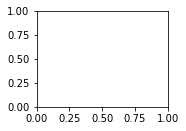

[2021-06-15 13:45:31 Central Daylight Time]    INFO: ...processing chaetoPlankton 


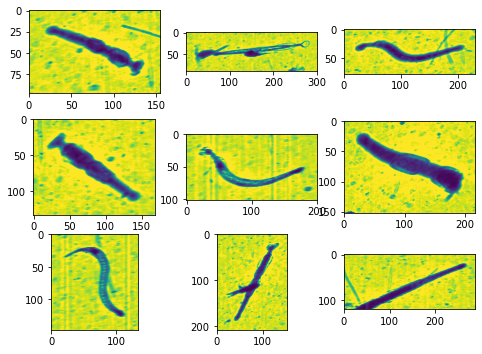

[2021-06-15 13:45:32 Central Daylight Time]    INFO: ...processing cleanhousePlankton 


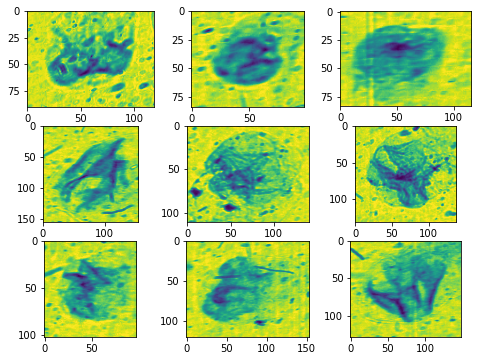

[2021-06-15 13:45:32 Central Daylight Time]    INFO: ...processing diatomPlankton 


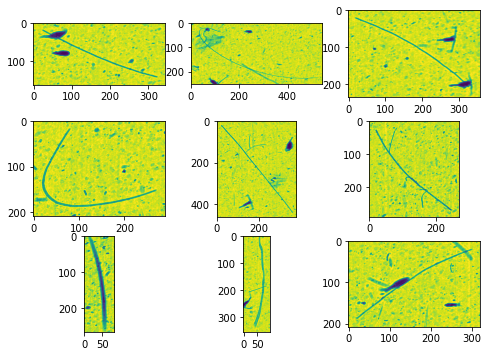

[2021-06-15 13:45:33 Central Daylight Time]    INFO: ...processing hydromedusaePlankton 


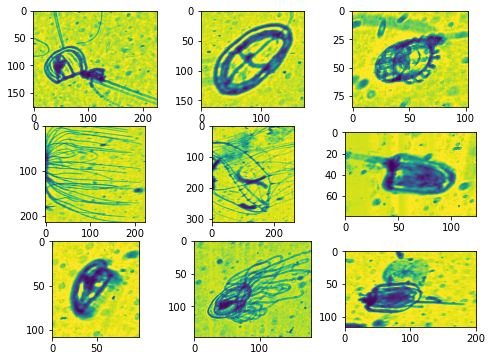

[2021-06-15 13:45:34 Central Daylight Time]    INFO: ...processing snowPlankton 


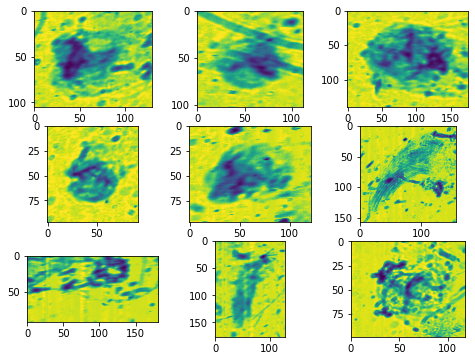

[2021-06-15 13:45:35 Central Daylight Time]    INFO: Processing train 
[2021-06-15 13:45:35 Central Daylight Time]    INFO: ...processing appinhousePlankton 


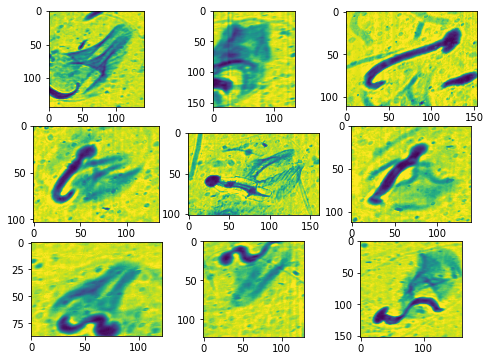

[2021-06-15 13:45:36 Central Daylight Time]    INFO: ...processing chaetoPlankton 


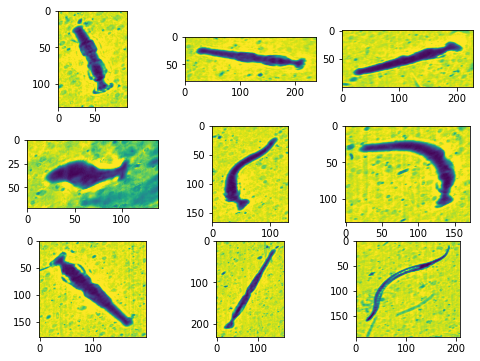

[2021-06-15 13:45:36 Central Daylight Time]    INFO: ...processing cleanhousePlankton 


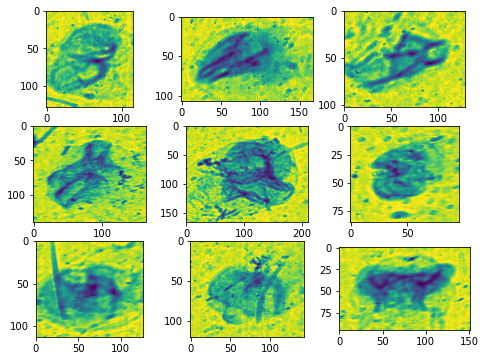

[2021-06-15 13:45:37 Central Daylight Time]    INFO: ...processing diatomPlankton 


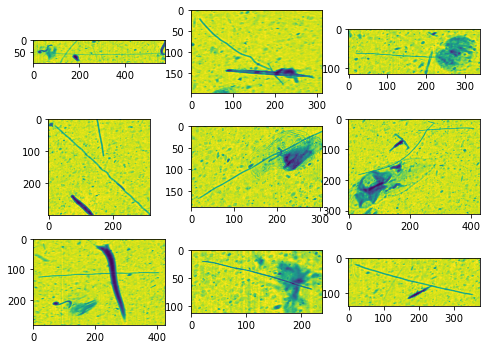

[2021-06-15 13:45:38 Central Daylight Time]    INFO: ...processing hydromedusaePlankton 


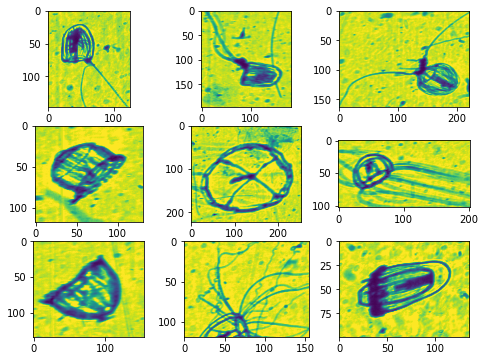

[2021-06-15 13:45:39 Central Daylight Time]    INFO: ...processing snowPlankton 


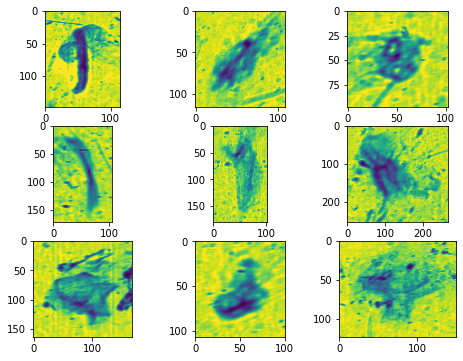

In [60]:
######################################################################
#Show the images at a basic level
######################################################################
for dataset in datasets:
 debug.msg_info("Processing {}".format(dataset))
 dataset_folder = root_folder + os.sep + dataset
 for plankton in label_names:
     debug.msg_info("...processing {}".format(plankton))
     plankton_folder = dataset_folder + os.sep + plankton;
     # plot first few images
     for i in range(imgs_to_show):
         # define subplot
         pyplot.subplot(330 + 1 + i);
         # define filename
         filename = plankton_folder + os.sep + plankton+'_0000' + str(i) + '.tif';
         # load image pixels
         image = imread(filename);
         # plot raw pixel data
         pyplot.imshow(image);
     # show the figure
     pyplot.show()

In [63]:
def createTrainCiFAR():
    data = array('B')

    the_dir=root_folder+os.sep+"train"
    print("Processing directory:{}".format(the_dir))
    for dirname, dirnames, filenames in os.walk(the_dir):
        for filename in filenames:
            if filename.endswith('.tif'):

                ################
                #grab the image#
                ################

                im = Image.open(os.path.join(dirname, filename))
                pix = im.load()
                #print(os.path.join(dirname, filename))

                #store the class name from look at path
                print(os.path.join(dirname).split('/')[-1])
                class_name = int(os.path.join(dirname).split('/')[-1])
                #print(class_name)

                ###########################
                #get image into byte array#
                ###########################

                # create array of bytes to hold stuff

                #first append the class_name byte
                data.append(class_name)

                #then write the rows
                #Extract RGB from pixels and append
                #note: first we get red channel, then green then blue
                #note: no delimeters, just append for all images in the set
                for color in range(0,3):
                    for x in range(0,32):
                        for y in range(0,32):
                            data.append(pix[x,y][color])


    ############################################
    #write all to binary, all set for cifar10!!#
    ############################################

    output_file = open(root_folder + os.sep + "cifar10-train.bin", 'wb')
    data.tofile(output_file)
    output_file.close()
    
print("CiFAR Train Start")
createTrainCiFAR()    
print("CiFAR Train Complete")

CiFAR Train Start
Processing directory:C:\Users\cwood\Documents\jbooks\..\INTRO_DATA\CNN_Beta_002\train
C:\Users\cwood\Documents\jbooks\..\INTRO_DATA\CNN_Beta_002\train\appinhousePlankton


ValueError: invalid literal for int() with base 10: 'C:\\Users\\cwood\\Documents\\jbooks\\..\\INTRO_DATA\\CNN_Beta_002\\train\\appinhousePlankton'

## Model 6 using Pre-trained Model

Using VGG16, utilize transfer learning to start with some knowledge of lines and curves, create a neural layer tailored to Plankton identification.

In [18]:
# vgg16 model used for transfer learning

# define cnn model
def define_model():
    # load model, discluding the top ensures you can define how the model is structured
    model = VGG16(weights=None, include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, IMG_DIMS), classes=3)
    
    # 20200929 - mark loaded layers as trainable, weights of early training can be altered which has been empirically shown to be a better result for this data.
    for layer in model.layers:
        layer.trainable = True
        
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)

    # could increase neurons at this next layer if desired.  THis would be a job for hyper parameters
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    
    # use softmax function as only one image can be one thing.  Unless a binary classification or multi-label issue then use softmax vice sigmoid.
    output = Dense(1, activation='softmax')(class1)
    
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    
    # compile model, more potential for hyper-parameters
    opt = SGD(lr=0.001, momentum=0.9)
    
    #by default binary_crossentropy is used but spare or categorical_entropy is an option as well.  Yet another case for Hyper-parameter tuning.
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    #df_history = pd.DataFrame(history.history)
    #sns.lineplot(data=df_history[['accuracy','val_accuracy']], palette="tab10", linewidth=2.5);
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = 'ML-007a_Diagnostics'
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()

#-run the test harness for evaluating a model
def run_test_harness():
    
    
    # define model
    model = define_model()

    ##-create data generator, this prevents custom 
    datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, vertical_flip=True, rotation_range=90, featurewise_center=True)
    
    #specify imagenet mean values for centering, this is based on original inputs to VGG16.
    datagen.mean = [123.68, 116.779, 103.939]
    
    ##-prepare iterator, added shuffle = False for training purposes and evaluation (initial)
    train_it = datagen.flow_from_directory(root_folder + os.sep + 'train/',  class_mode='binary', batch_size=64, target_size=(224, 224), shuffle=False)
    test_it = datagen.flow_from_directory(root_folder + os.sep + 'test/', class_mode='binary', batch_size=64, target_size=(224, 224), shuffle=False)
    
    ##-fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
    
    #show results
    summarize_diagnostics(history)
    
    ##-evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    
    print('> %.3f' % (acc * 100.0))
    
    ##-learning curves
    summarize_diagnostics(history)
    
    ##-summarize layers
    model.summary()
    
    ##-save the model
    model.save('ML-007a.h5')

In [43]:
#Define global constants for the number of epochs when training an individual model (n_epochs) or doing a grid search with cross validation (n_epochs_cv). Reduce these 2 values if you want to reduce the running time of the kernel.
#Define the number of runs for cross validation (when using Scikit Learn GridSearchCV) and the size of the validation set for train_test_split.

n_epochs = 30 # 30 
n_epochs_cv = 10 # 10  # reduce number of epochs for cross validation for performance reason

#number of cross_validations
n_cv = 3
validation_ratio = 0.10

In [44]:
# define function to display the results of the grid search
def display_cv_results(search_results):
    print('Best score = {:.4f} using {}'.format(search_results.best_score_, search_results.best_params_))
    means = search_results.cv_results_['mean_test_score']
    stds = search_results.cv_results_['std_test_score']
    params = search_results.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print('mean test accuracy +/- std = {:.4f} +/- {:.4f} with: {}'.format(mean, stdev, param))    

In [45]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
    #df_history = pd.DataFrame(history.history)
    #sns.lineplot(data=df_history[['accuracy','val_accuracy']], palette="tab10", linewidth=2.5);
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = 'ML-007a_Diagnostics'
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()

In [46]:
# vgg16 model used for transfer learning
# define cnn model
def define_model(learn_rate, momentum, neuron, activation, kernel):
    # load model, discluding the top ensures you can define how the model is structured
    model = VGG16(weights=None, include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, IMG_DIMS), classes=3)
    
    # 20200929 - mark loaded layers as trainable, weights of early training can be altered which has been empirically shown to be a better result for this data.
    for layer in model.layers:
        layer.trainable = True
        
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)

    # could increase neurons at this next layer if desired.  THis would be a job for hyper parameters
    class1 = Dense(neuron, activation=activation, kernel_initializer=kernel)(flat1)
    
    # use sigmoid function as only one image can be one thing.  Unless a binary classification or multi-label issue then use softmax vice sigmoid.
    output = Dense(1, activation='softmax')(class1)
    
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    
    # compile model, more potential for hyper-parameters
    opt = SGD(lr=learn_rate, momentum=momentum)
    
    #by default binary_crossentropy is used but spare or categorical_entropy is an option as well.  Yet another case for Hyper-parameter tuning.
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model



In [24]:
#-run the test harness for evaluating a model
def run_gridSearch():

    # create model
    model = KerasClassifier(build_fn=define_model, verbose=1)
    
    ##-create data generator, this prevents custom 
    datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, vertical_flip=True, rotation_range=90, featurewise_center=True)
    
    #specify imagenet mean values for centering, this is based on original inputs to VGG16.
    datagen.mean = [123.68, 116.779, 103.939]
    
    ##-prepare iterator, added shuffle = False for training purposes and evaluation (initial)
    train_it = datagen.flow_from_directory(root_folder + os.sep + 'train/',  class_mode='binary', batch_size=64, target_size=(224, 224), shuffle=False)
    test_it = datagen.flow_from_directory(root_folder + os.sep + 'test/', class_mode='binary', batch_size=64, target_size=(224, 224), shuffle=False)

    # define parameters and values for grid search 
    learn_rates = [0.001, 0.01, 0.1, 0.2, 0.3]
    learn_rates = [0.001, 0.2]

    momentums = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
    momentums = [0.4, 0.9]

    epochs = [10, 50, 100]
    epochs = [10]

    optimizers = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
    optimizers = ['Adam', 'SGD']

    losses =['categorical_crossentropy']
    losses =['binary_crossentropy', 'sparse_categorical_crossentropy','poisson', 'mean_squared_error','mean_absolute_error','mean_absolute_percentage_error', 'mean_squared_logarithmic_error','cosine_similarity', 'huber_loss']
    
    neurons=[64, 128, 256]
    neurons=[64]

    activations=['relu', 'sigmoid', 'softmax', 'softplus', 'softsign', 'tanh', 'selu']
    activations=['relu']

    kernel_initializers=['he_normal', 'he_uniform', 'glorot_normal', 'glorot_uniform', 'lecun_normal', 'lecun_uniform', 'orthogonal']
    kernel_initializers=['he_normal']

    param_grid = {
        'learn_rate': learn_rates,
        'momentum':   momentums,    
        'neuron':     neurons,
        'activation': activations,
        'kernel':     kernel_initializers,
    }

    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=n_cv)
    
    grid_result = grid.fit(train_it, test_it)

    # summarize results
    print('time for grid search = {:.0f} sec'.format(time()-start))
    display_cv_results(grid_result)

In [ ]:
#-run the test harness for evaluating a model
def run_gridResults_DataAugmentation():

    # create model
    model = KerasClassifier(build_fn=define_model, verbose=1)
    
    ##-create data generator, this prevents custom 
    datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, vertical_flip=True, rotation_range=90, featurewise_center=True)
    
    #specify imagenet mean values for centering, this is based on original inputs to VGG16.
    datagen.mean = [123.68, 116.779, 103.939]
    
    ##-prepare iterator, added shuffle = False for training purposes and evaluation (initial)
    train_it = datagen.flow_from_directory(root_folder + os.sep + 'train/',  class_mode='binary', batch_size=64, target_size=(224, 224), shuffle=False)
    test_it = datagen.flow_from_directory(root_folder + os.sep + 'test/', class_mode='binary', batch_size=64, target_size=(224, 224), shuffle=False)

    # define parameters and values for grid search 
    learn_rates = [0.001, 0.01, 0.1, 0.2, 0.3]
    learn_rates = [0.001, 0.2]

    momentums = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
    momentums = [0.4, 0.9]

    epochs = [10, 50, 100]
    epochs = [10]

    optimizers = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
    optimizers = ['Adam', 'SGD']

    losses =['categorical_crossentropy']
    losses =['binary_crossentropy', 'sparse_categorical_crossentropy','poisson', 'mean_squared_error','mean_absolute_error','mean_absolute_percentage_error', 'mean_squared_logarithmic_error','cosine_similarity', 'huber_loss']
    
    neurons=[64, 128, 256]
    neurons=[64]

    activations=['relu', 'sigmoid', 'softmax', 'softplus', 'softsign', 'tanh', 'selu']
    activations=['relu']

    kernel_initializers=['he_normal', 'he_uniform', 'glorot_normal', 'glorot_uniform', 'lecun_normal', 'lecun_uniform', 'orthogonal']
    kernel_initializers=['he_normal']

    param_grid = {
        'learn_rate': learn_rates,
        'momentum':   momentums,    
        'neuron':     neurons,
        'activation': activations,
        'kernel':     kernel_initializers,
    }

    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=n_cv)
    
    grid_result = grid.fit(X_train, to_categorical(y_train))

    # summarize results
    print('time for grid search = {:.0f} sec'.format(time()-start))
    display_cv_results(grid_result)
    
    early_stop = EarlyStopping(monitor = 'accuracy', mode = 'max', patience=5, restore_best_weights=True)
    
    ##-fit model
    history = model.fit_generator(train_it, 
                                  steps_per_epoch=len(train_it) / 32, 
                                  validation_data=test_it, 
                                  validation_steps=len(test_it), 
                                  epochs=n_epochs,
                                  verbose=1,
                                  callbacks=[early_stop])
    
    #show results
    summarize_diagnostics(history)
    
    ##-evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    
    print('> %.3f' % (acc * 100.0))
    
    ##-learning curves
    summarize_diagnostics(history)
    
    ##-summarize layers
    model.summary()
    
    ##-save the model
    model.save('ML-007a.h5')

## Understand this...

...before you run this example.

1. Processing this neural layer will take a while.

2. Results are the diagnostics .png and the .h5.  The .h5 file is a set of weighted probabilities that the neural layer uses at startup (the persisted brains).

3. Use of this code assumes GPU's.  Will not work with CPU's only.

In [25]:
try:
  tf.config.set_soft_device_placement(True)
  #tf.debugging.set_log_device_placement(True)
  gpus = tf.config.experimental.list_physical_devices('GPU')
  debug.msg_info("Num Physical GPU's Available: {} ".format(len(tf.config.experimental.list_physical_devices('GPU'))))
  debug.msg_info("Num Logical  GPU's Available: {} ".format(len(tf.config.experimental.list_logical_devices('GPU'))))
  debug.msg_info("Num CPU's Available: {} ".format(len(tf.config.experimental.list_physical_devices('CPU'))))
  if gpus:
      try:
          tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
      except RuntimeError as e:
          debug.msg_error(str(e))

  strategy=tf.distribute.MirroredStrategy()
  with strategy.scope():
        ##-entry point, run the test harness
        run_gridSearch()
        
except RuntimeError as e:
         debug.msg_error(str(e))


[2021-06-15 11:36:20 Central Daylight Time]    INFO: Num Physical GPU's Available: 0  
[2021-06-15 11:36:20 Central Daylight Time]    INFO: Num Logical  GPU's Available: 0  
[2021-06-15 11:36:20 Central Daylight Time]    INFO: Num CPU's Available: 1  
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Found 72000 images belonging to 6 classes.
Found 18000 images belonging to 6 classes.


ValueError: Found input variables with inconsistent numbers of samples: [1125, 282]